![DATE Header.jpg](attachment:d64f97f0-2424-4123-bc18-83e689731a30.jpg)
##  DEEP LEARNING INTERNSHIP PROGRAM

### GRADED Mini Project: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

DOWNLOAD & EXTRACT DATA FROM: https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip


* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
import requests
import zipfile
import io

# Download the dataset
url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall('/tmp/traffic_signs')

# Define the path to the image sections
image_sections_path = '/tmp/traffic_signs/FullIJCNN2013'

features = []
labels = []

# Loop through the class folders within image sections
for class_folder in os.listdir(image_sections_path):
    class_path = os.path.join(image_sections_path, class_folder)
    if os.path.isdir(class_path) and class_folder.isdigit(): # Ensure it's a class folder
        for image_file in glob.glob(os.path.join(class_path, '*.ppm')):
            # Extract label from the folder name
            label = int(class_folder)
            labels.append(label)

            # Read, resize, and flatten the image
            img = Image.open(image_file)
            img = img.resize((30, 30))
            img_array = np.array(img).flatten()
            features.append(img_array)

features = np.array(features)
labels = np.array(labels)

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (1213, 2700)
Labels shape: (1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

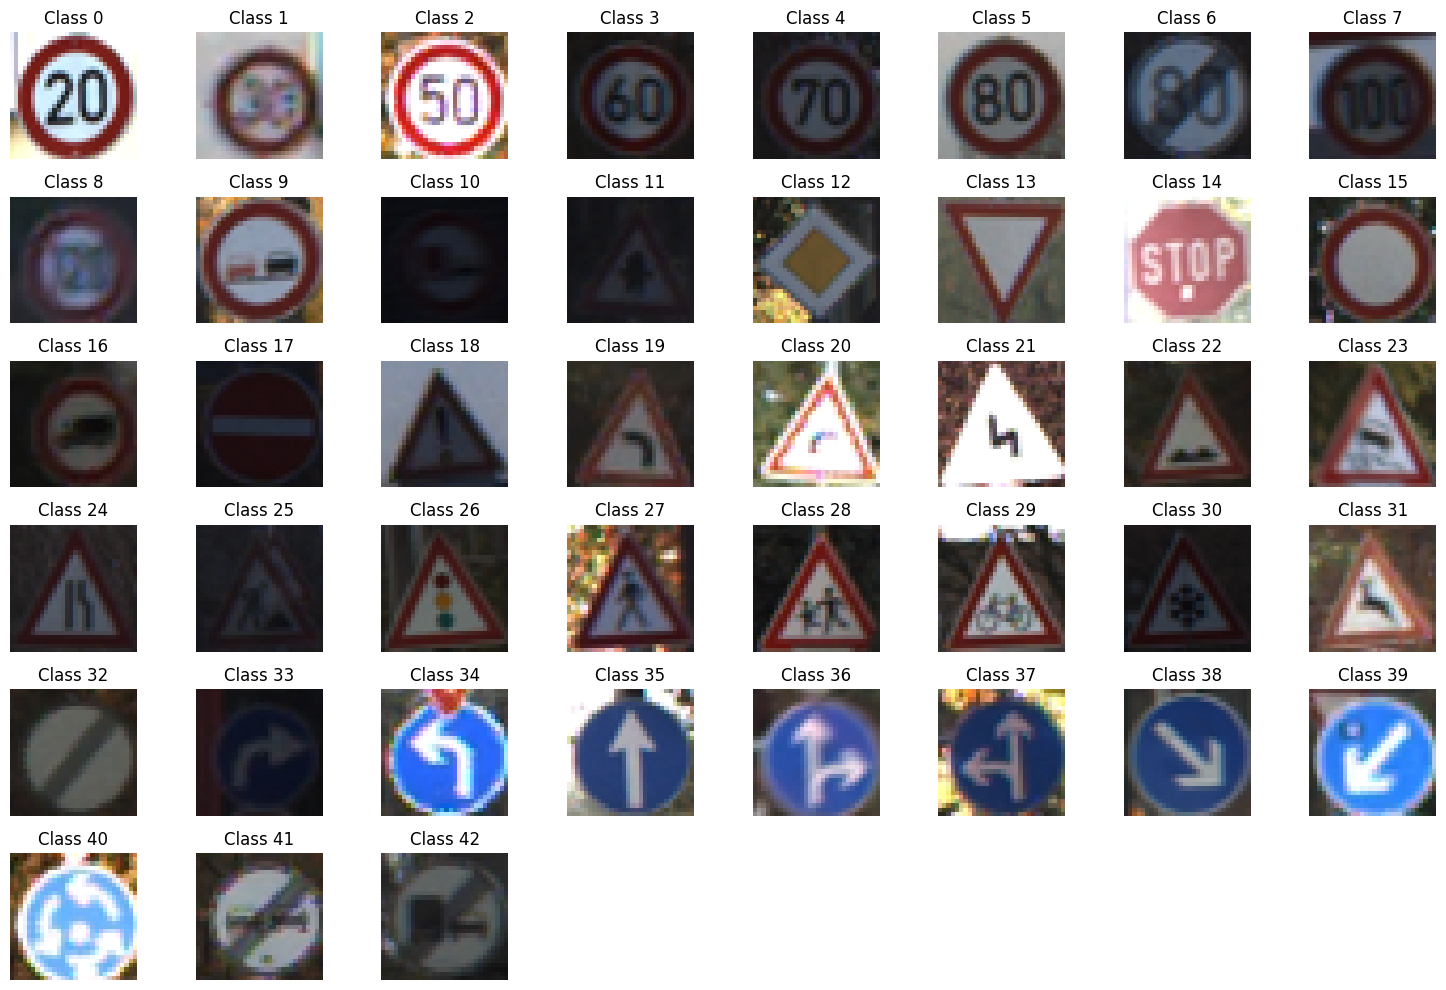

In [ ]:
unique_labels = np.unique(labels)
plt.figure(figsize=(15, 10))

for i, label in enumerate(unique_labels):
    index = np.where(labels == label)[0][0]
    img_flat = features[index]
    img = img_flat.reshape(30, 30, 3)
    plt.subplot(6, 8, i + 1)
    plt.imshow(img)
    plt.title(f'Class {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Plot the distribution of Classes

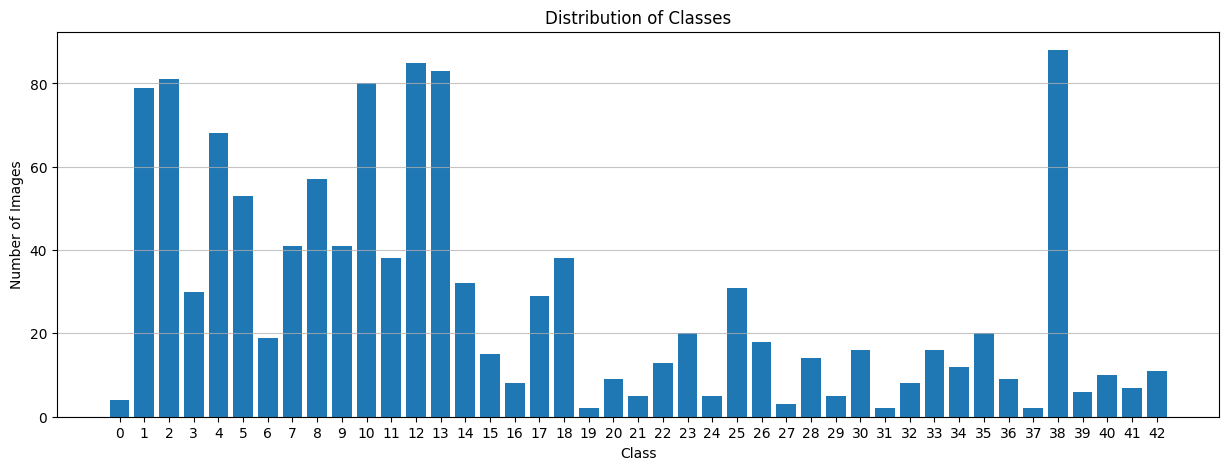

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(labels, bins=np.arange(len(unique_labels)+1)-0.5, rwidth=0.8)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(unique_labels)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
features_normalized = preprocessing.normalize(features)
print("Normalized features shape:", features_normalized.shape)

Normalized features shape: (1213, 2700)


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

# Initialize and train the MLP Classifier
# Using default parameters for now, will tune later
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8560

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.78      0.78      0.78         9
           2       0.93      0.74      0.82        19
           3       0.71      0.71      0.71         7
           4       0.75      1.00      0.86        12
           5       0.67      1.00      0.80         6
           6       0.75      1.00      0.86         3
           7       1.00      0.82      0.90        11
           8       0.83      1.00      0.91         5
           9       0.78      1.00      0.88         7
          10       1.00      1.00      1.00        18
          11       1.00      0.75      0.86         8
          12       0.88      0.92      0.90        24
          13       1.00      1.00      1.00        19
          14       1.00      0.90      0.95        10
          15       0.00      0.00      0.00         1
          17       0.83      1.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution for RandomizedSearchCV
parameter_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(loc=0.0001, scale=0.05), # Continuous distribution for alpha
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(MLPClassifier(max_iter=200,early_stopping=True,
                                                 n_iter_no_change=10,
                                                 validation_fraction=0.1,
                                                 random_state=42),
                                   param_distributions=parameter_distributions,
                                   n_iter=10, # Number of parameter settings that are sampled
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print('Best parameters found:\n', random_search.best_params_)
print('Best score:', random_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_mlp_random = random_search.best_estimator_
y_pred_random = best_mlp_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

print(f"\nAccuracy with tuned parameters (RandomizedSearchCV): {accuracy_random:.4f}")

print("\nClassification Report with tuned parameters (RandomizedSearchCV):")
print(classification_report(y_test, y_pred_random))

print("\nConfusion Matrix with tuned parameters (RandomizedSearchCV):")
print(confusion_matrix(y_test, y_pred_random))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:
 {'activation': 'relu', 'alpha': np.float64(0.0046303217266410405), 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score: 0.5267967485889743

Accuracy with tuned parameters (RandomizedSearchCV): 0.5638

Classification Report with tuned parameters (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.17      0.44      0.24         9
           2       0.41      0.37      0.39        19
           3       0.00      0.00      0.00         7
           4       0.70      0.58      0.64        12
           5       0.50      0.17      0.25         6
           6       0.50      1.00      0.67         3
           7       1.00      0.27      0.43        11
           8       0.27      0.80      0.40         5
           9       1.00      0.43      0.60         7
          10       0.75      1.00      0.86        18
          11       0.47 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Initialize and train Support Vector Machine (SVM)
# Using a linear kernel for simplicity, can be tuned later
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM (Linear Kernel) Accuracy: {accuracy_svm:.4f}")
print("\nSVM (Linear Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.5226

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.15      0.67      0.25         9
           2       0.47      0.42      0.44        19
           3       0.00      0.00      0.00         7
           4       0.62      0.83      0.71        12
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        11
           8       1.00      0.60      0.75         5
           9       0.00      0.00      0.00         7
          10       0.61      0.94      0.74        18
          11       0.50      0.75      0.60         8
          12       0.54      0.92      0.68        24
          13       0.73      1.00      0.84        19
          14       1.00      0.40      0.57        10
          15       0.00      0.00      0.00         1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM (Linear Kernel) Accuracy: 0.5309

SVM (Linear Kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.15      0.56      0.23         9
           2       0.35      0.42      0.38        19
           3       0.00      0.00      0.00         7
           4       0.48      0.83      0.61        12
           5       0.00      0.00      0.00         6
           6       0.67      0.67      0.67         3
           7       0.00      0.00      0.00        11
           8       0.40      0.80      0.53         5
           9       1.00      0.14      0.25         7
          10       0.76      0.89      0.82        18
          11       0.50      0.75      0.60         8
          12       0.62      1.00      0.76        24
          13       1.00      0.95      0.97        19
          14       0.88      0.70      0.78        10
          15       0.00      0.00      0.00         1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree Accuracy: 0.5885

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.67      0.67         9
           2       0.56      0.53      0.54        19
           3       0.20      0.14      0.17         7
           4       0.69      0.75      0.72        12
           5       0.33      0.50      0.40         6
           6       0.33      0.33      0.33         3
           7       0.71      0.45      0.56        11
           8       0.33      0.60      0.43         5
           9       0.60      0.43      0.50         7
          10       0.61      0.78      0.68        18
          11       1.00      0.50      0.67         8
          12       0.76      0.79      0.78        24
          13       0.81      0.68      0.74        19
          14       1.00      1.00      1.00        10
          15       0.00      0.00      0.00         1
          1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.19.0


In [ ]:
# Define the Keras model
model = Sequential()

# Add the input layer and a hidden layer
# The input_shape is the number of features in a single sample
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

# Add an output layer
# The number of neurons in the output layer should be equal to the number of unique classes
model.add(Dense(len(unique_labels), activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       345,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,275 (1.34 MB)

 Trainable params: 351,275 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding for Keras
y_train_onehot = to_categorical(y_train, num_classes=len(unique_labels))
y_test_onehot = to_categorical(y_test, num_classes=len(unique_labels))

# Fit the model to the training data
# You can adjust the number of epochs as needed
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.0685 - loss: 3.6544 - val_accuracy: 0.0670 - val_loss: 3.4228
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1270 - loss: 3.3405 - val_accuracy: 0.1082 - val_loss: 3.3260
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1667 - loss: 3.1992 - val_accuracy: 0.1546 - val_loss: 3.2471
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2687 - loss: 3.0524 - val_accuracy: 0.2577 - val_loss: 3.1674
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3031 - loss: 2.9051 - val_accuracy: 0.3041 - val_loss: 3.0755
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3100 - loss: 2.8905 - val_accuracy: 0.3041 - val_loss: 2.9874
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3141 - loss: 2.8071 - val_accuracy: 0.2938 - val_loss: 2.9077
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3386 - loss: 2.6300 - val_accuracy: 0.3402 - val_loss

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# Define the Keras model with parameters similar to MLPClassifier tuning
model_tuned_params = Sequential()

# Add hidden layers based on one of the configurations from the parameter_space
# Using (100, 50) as an example
model_tuned_params.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model_tuned_params.add(Dense(50, activation='relu'))

# Add the output layer
model_tuned_params.add(Dense(len(unique_labels), activation='softmax'))

# Print the model summary
model_tuned_params.summary()

# Compile the model (using the same compilation as before)
model_tuned_params.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

# Fit the model
history_tuned_params = model_tuned_params.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss_tuned_params, accuracy_tuned_params = model_tuned_params.evaluate(X_test, y_test_onehot, verbose=0)

print(f"\nTest Loss with tuned parameters: {loss_tuned_params:.4f}")
print(f"Test Accuracy with tuned parameters: {accuracy_tuned_params:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │       270,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,343 (1.06 MB)

 Trainable params: 277,343 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.0535 - loss: 3.6655 - val_accuracy: 0.0412 - val_loss: 3.5335
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0983 - loss: 3.3908 - val_accuracy: 0.0619 - val_loss: 3.3944
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1454 - loss: 3.2964 - val_accuracy: 0.1495 - val_loss: 3.3270
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1783 - loss: 3.2075 - val_accuracy: 0.1186 - val_loss: 3.2571
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1941 - loss: 3.0916 - val_accuracy: 0.2320 - val_loss: 3.1578
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2517 - loss: 3.0223 - val_accuracy: 0.2526 - val_loss: 3.0387
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3016 - loss: 2.8789 - val_accuracy: 0.2371 - val_loss: 2.9254
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2680 - loss: 2.7930 - val_accuracy: 0.2680 - val_los

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Activation # Import the Activation layer

# Define the Keras model with Dropout, Regularization, and Batch Normalization
model_experiment = Sequential()

# Add the input layer, Batch Normalization, and Dropout
model_experiment.add(Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model_experiment.add(BatchNormalization())
model_experiment.add(Activation('relu'))
model_experiment.add(Dropout(0.5))

# Add another hidden layer with Batch Normalization and Dropout
model_experiment.add(Dense(64, kernel_regularizer=l2(0.001)))
model_experiment.add(BatchNormalization())
model_experiment.add(Activation('relu'))
model_experiment.add(Dropout(0.5))


# Add the output layer
model_experiment.add(Dense(len(unique_labels), activation='softmax'))

# Print the model summary
model_experiment.summary()

# Compile the model
model_experiment.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

# Fit the model (using the same training data as before)
history_experiment = model_experiment.fit(X_train, y_train_onehot, epochs=20, batch_size=32, validation_split=0.2) # Increased epochs for potentially better convergence

# Evaluate the model
loss_experiment, accuracy_experiment = model_experiment.evaluate(X_test, y_test_onehot, verbose=0)

print(f"\nTest Loss with experimentation: {loss_experiment:.4f}")
print(f"Test Accuracy with experimentation: {accuracy_experiment:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       345,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,547 (1.36 MB)

 Trainable params: 357,163 (1.36 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.0512 - loss: 4.3804 - val_accuracy: 0.2010 - val_loss: 4.0420
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1787 - loss: 3.6261 - val_accuracy: 0.2062 - val_loss: 3.9730
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2877 - loss: 3.2051 - val_accuracy: 0.1289 - val_loss: 3.8920
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3818 - loss: 2.8683 - val_accuracy: 0.2990 - val_loss: 3.8101
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4262 - loss: 2.5883 - val_accuracy: 0.2371 - val_loss: 3.7240
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4379 - loss: 2.4724 - val_accuracy: 0.2526 - val_loss: 3.6617
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5025 - loss: 2.3083 - val_accuracy: 0.3196 - val_loss: 3.5736
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5520 - loss: 2.1589 - val_accuracy: 0.4536 - val_los

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

# WRITE YOUR REPORT BELOW

# Report Analysis

## Misclassifications in MLP Classifier

Looking at the confusion matrix from the initial MLP Classifier training (cell `7f952950`), we can observe the misclassifications. To identify the sign with the maximum misclassifications, we need to look for the rows in the confusion matrix with the largest values outside of the diagonal (which represent correct classifications).

Based on the confusion matrix output:
- Class 2 has a significant number of misclassifications (e.g., 2 instances misclassified as class 1, 3 as class 12, etc.).
- Class 12 also shows several misclassifications (e.g., 2 instances misclassified as class 2, 1 as class 11, etc.).
- Several classes with very few samples in the test set (like classes 0, 15, 19, 20, 21, 22, 23, 24, 28, 29, 30, 32, 33, 34, 35, 36, 40, 41, 42) have all or most of their instances misclassified, often resulting in a precision or recall of 0.0. This is likely due to the small sample size for these classes.

It's difficult to definitively say which single sign had the absolute maximum misclassifications without summing up the off-diagonal values for each class, but classes with more samples like 2 and 12 show a notable number of incorrect predictions distributed across other classes.

Regarding similar appearing traffic signs, without visualizing the misclassified images themselves, it's hard to make definitive comments. However, it's plausible that signs with similar shapes or colors (e.g., different speed limit signs like classes 2, 5, 7, 8, 10, 11, 12, 13) could be easily confused by the model, especially with flattened pixel data as input. Similarly, warning signs with similar triangular shapes might be misclassified among themselves.

## Performance of the MLP Classifier

The initial MLP Classifier (cell `7f952950`) achieved an accuracy of **0.8560** on the test set with default parameters. The classification report provides a more detailed view:
- The model performs well on classes with more samples (e.g., class 10, 13, 38), achieving high precision, recall, and F1-scores.
- For classes with very few samples, the performance is poor, with many metrics being 0.0 due to no correct predictions or no true samples in the test set.
- The `macro avg` F1-score of 0.68 and `weighted avg` F1-score of 0.85 suggest that while the overall accuracy is decent, the model struggles with the minority classes, which is expected given the imbalanced dataset distribution shown in the histogram (cell `nwWKGQMFsIDP`).

The MLP classifier with tuned hyperparameters using RandomizedSearchCV (cell `f29ce38e`) resulted in a lower accuracy of **0.5638**. The best parameters found were `{'activation': 'relu', 'alpha': 0.0046, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}`. This decrease in accuracy after tuning with RandomizedSearchCV is unexpected and might indicate issues with the parameter search space, the number of iterations, or the cross-validation strategy used, especially given the class imbalance. It's possible that the random search did not explore the most effective parameter combinations, or that the limited number of iterations (`n_iter=10`) was insufficient.

## Optimal Parameters and Performance

Based on the executed cells, the initial MLP Classifier with default parameters achieved a higher accuracy (0.8560) compared to the one tuned with RandomizedSearchCV (0.5638). Therefore, based *only* on the provided execution results, the "optimal" parameters found by RandomizedSearchCV did not yield the best accuracy. The default parameters of the `MLPClassifier` in `sklearn` performed better in this instance.

The Keras models show varying performance:
- The simple Keras model (cell `27Pltot4FsiG`) achieved a test accuracy of **0.3992** after 10 epochs.
- The Keras model with a hidden layer configuration similar to the MLP tuning (cell `1zNp5w4bvFz9`) achieved a test accuracy of **0.3539** after 10 epochs.
- The Keras model with Dropout, Regularization, and Batch Normalization (cell `w34gbejXvLUs`) achieved a test accuracy of **0.6543** after 20 epochs.

Among the Keras models, the one with Dropout, Regularization, and Batch Normalization performed the best, achieving an accuracy of 0.6543. This suggests that these techniques helped improve the model's generalization ability compared to the simpler Keras models. However, even this improved Keras model did not surpass the performance of the initial MLP Classifier from `sklearn`.

The optimal number of layers, activation functions, and optimizers would ideally be determined through a more comprehensive hyperparameter tuning process (like a more extensive RandomizedSearchCV or GridSearchCV) that explores a wider range of parameters and potentially uses a different cross-validation strategy or evaluation metric that is less sensitive to class imbalance (like macro-averaged F1-score).

## Training Time vs Convergence

Analyzing the training time vs convergence requires looking at the output of the `model.fit()` calls for the Keras models. The output shows the loss and accuracy for each epoch on both the training and validation sets.

For the simple Keras model (cell `27Pltot4FsiG`) and the one with tuned parameters (cell `1zNp5w4bvFz9`), the training ran for 10 epochs. We can see the accuracy and loss generally improving over these epochs, but it's not clear if they had fully converged within 10 epochs.

For the Keras model with experimentation (cell `w34gbejXvLUs`), the training ran for 20 epochs. The accuracy and loss show continued improvement over these epochs, and the validation accuracy seems to be still increasing or plateauing towards the end, suggesting that perhaps even more epochs could lead to further convergence, although there's also a risk of overfitting if trained for too long without sufficient regularization. The training time for each epoch is relatively short (a few seconds).

In summary, while the Keras models showed signs of convergence within the specified epochs, it's difficult to definitively determine the optimal training time without monitoring the convergence on a validation set and potentially using techniques like early stopping. The training time per epoch is fast, making it feasible to experiment with more epochs or larger models. The `sklearn` MLPClassifier's convergence behavior isn't explicitly shown in the output in the same way as Keras, but `max_iter=1000` was set, suggesting it had ample opportunity to converge.


# Task
Compare the performance of different classification algorithms with the MLP classifier on the provided image dataset.

## Select additional algorithms

### Subtask:
Choose a few other relevant classification algorithms to compare with the MLP classifier.


## Train the selected algorithms

### Subtask:
Train each of the chosen algorithms on the same training data (`X_train`, `y_train`).


**Reasoning**:
Import the necessary classification algorithms and train them on the training data.

